* [Train.csv] : https://www.kaggle.com/roshansharma/market-basket-optimization


* matplotlib 한글 깨짐 현상 해결
> 셀 실행 후 런타임 재시작 필요

In [ ]:
# import matplotlib.pyplot as plt

# !apt-get update -qq
# !apt-get install fonts-nanum* -qq

# import matplotlib.font_manager as fm

# path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
# font_name = fm.FontProperties(fname=path, size=10).get_name()

# plt.rc('font', family=font_name)

# fm._rebuild()

Selecting previously unselected package fonts-nanum.
(Reading database ... 160815 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
from matplotlib import pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

#Part5. [실습5] 마케팅을 위한 연관 규칙 분석

## 01. 데이터 소개 및 분석프로세스 수립
 : "강의자료 → Ch04. [실습5] 마케팅을 위한 연관 규칙 분석" 참고

## 02. 데이터 준비를 위한 EDA 및 전처리

### 0. 데이터 불러오기

In [ ]:
!pip install squarify

In [ ]:
############################################## 00. 필요한 파이썬 라이브러리 불러오기 #####################################################
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import squarify
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from wordcloud import WordCloud

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/강의/실습자료/data/ch7/market_basket_optimization.csv', header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 데이터의 모양 알아보기
data.shape

(7501, 20)

In [ ]:
# 랜덤 샘플 데이터 보기
data.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
3023,tomatoes,mineral water,chocolate,chicken,pancakes,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6749,burgers,shrimp,whole wheat pasta,olive oil,eggs,cookies,energy drink,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5286,grated cheese,honey,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1773,burgers,chocolate,spaghetti,mineral water,milk,chicken,whole wheat rice,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3396,turkey,mineral water,eggs,green tea,hot dogs,cauliflower,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1719,frozen vegetables,escalope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6118,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5039,fromage blanc,eggs,french fries,zucchini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5055,spaghetti,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5776,whole wheat rice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1. 데이터 탐색

#### 1) 데이터 타입

In [ ]:
# 컬럼별 데이터 타입 알아보기
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


#### 2) 데이터 통계값

In [ ]:
# 컬럼별 간단한 통계값 보기
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,antioxydant juice,frozen smoothie,protein bar,cereals,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


#### 3) 인기 판매 상품 시각화

##### WordCloud

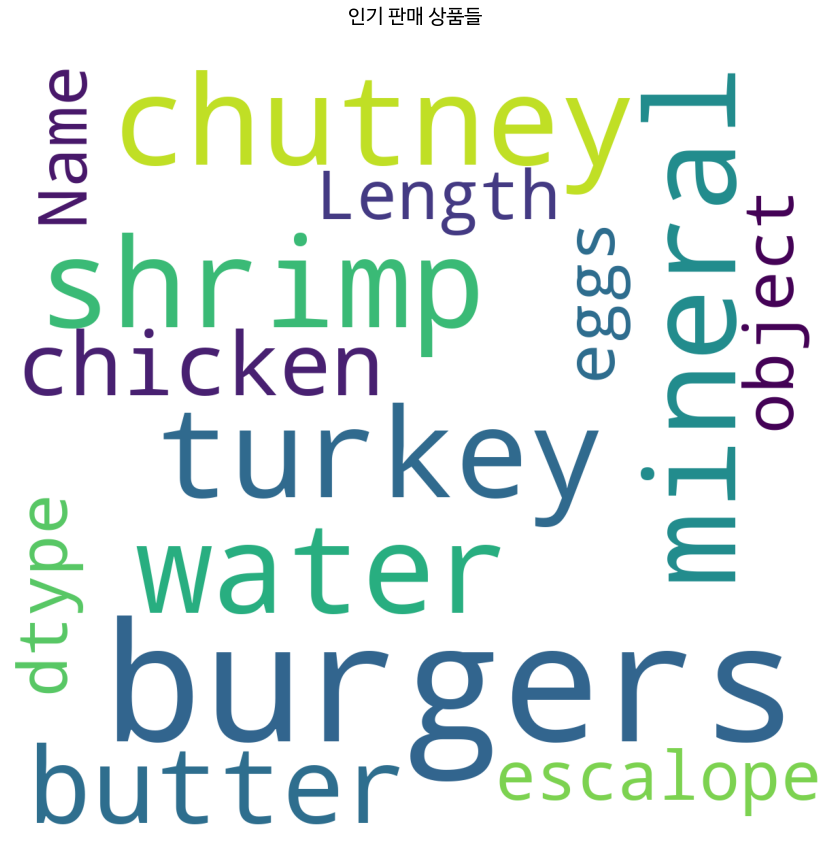

In [ ]:
plt.rcParams['figure.figsize'] = (15, 15)
###### 코드 작성 부분 시작 ######
# wordcloud = 
# plt.
###### 코드 작성 부분 마침 ######
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(data[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('인기 판매 상품들',fontsize = 20)
plt.show()

##### 히스토그램

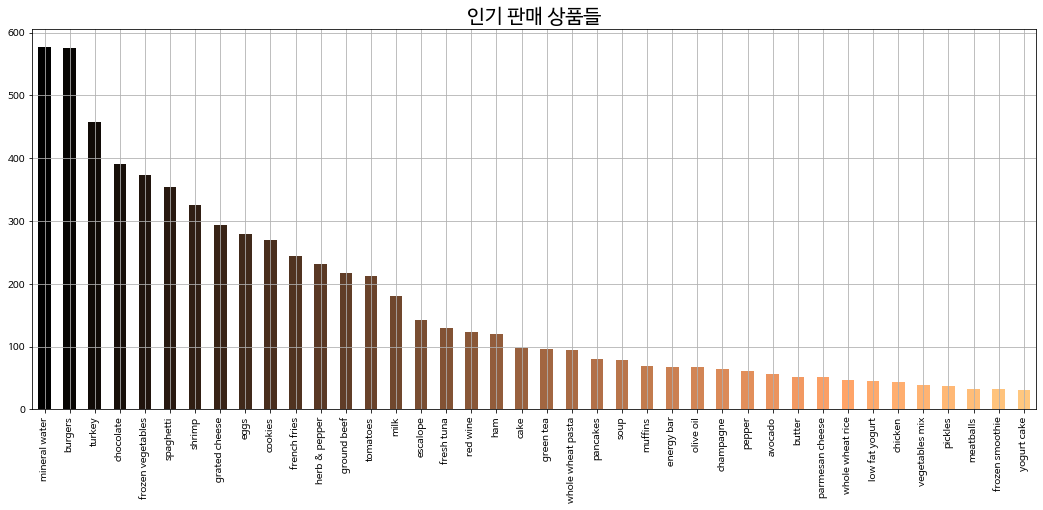

In [ ]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
###### 코드 작성 부분 시작 ######
# data[0].
###### 코드 작성 부분 마침 ######
plt.title('인기 판매 상품들', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

##### 트리맵

In [ ]:
y = data[0].value_counts().head(50).to_frame()
y.index

Index(['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables',
       'spaghetti', 'shrimp', 'grated cheese', 'eggs', 'cookies',
       'french fries', 'herb & pepper', 'ground beef', 'tomatoes', 'milk',
       'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
       'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar',
       'olive oil', 'champagne', 'pepper', 'avocado', 'butter',
       'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 'chicken',
       'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie',
       'yogurt cake', 'salmon', 'hot dogs', 'dessert wine', 'honey', 'cereals',
       'candy bars', 'oil', 'yams', 'tomato sauce', 'strawberries'],
      dtype='object')

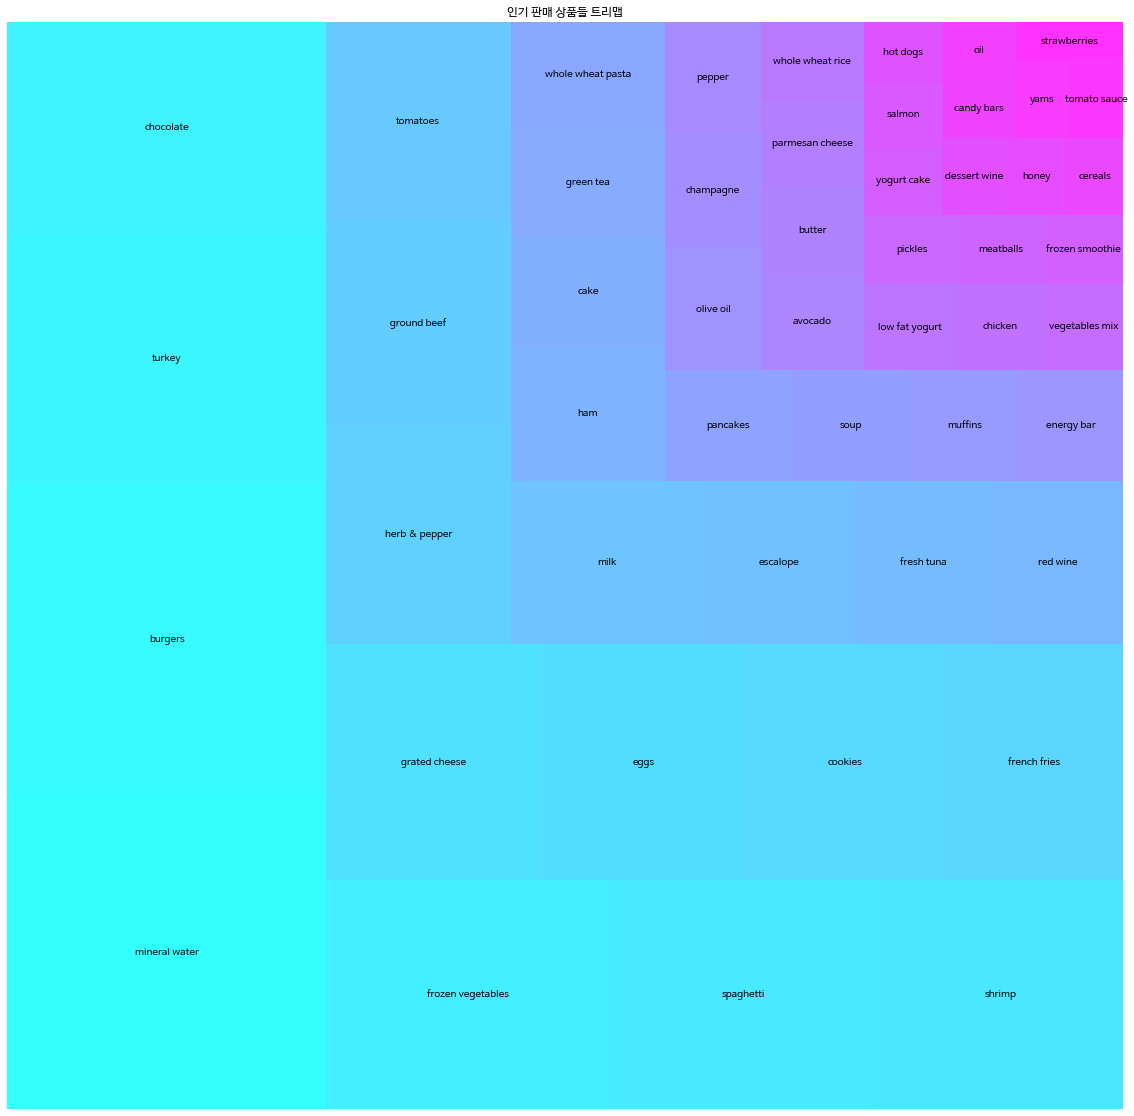

In [ ]:
plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.cool(np.linspace(0, 1, 50))
###### 코드 작성 부분 시작 ######
# squarify.
###### 코드 작성 부분 마침 ######
plt.title('인기 판매 상품들 트리맵')
plt.axis('off')
plt.show()

#### 4) 결측값

#### 5) 중복값

### 2. 데이터 전처리

#### 1) 데이터 컬럼명 수정

In [ ]:
# 동일한 크기의 리스트에 각 손님들의 쇼핑 목록을 넣기
trans = []
for i in range(0, 7501):
    trans.append([str(data.values[i,j]) for j in range(0, 20)])

# numpy array 로 변환
trans = np.array(trans)
print(trans.shape)

(7501, 20)


#### 2) Transaction Encoder 적용

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
###### 코드 작성 부분 시작 ######
# te =
# data = 
# data = 
###### 코드 작성 부분 마침 ######

data.shape

(7501, 121)

In [ ]:
data.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,...,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


> 기존 컬럼 대상으로 필터링

In [ ]:
len(y.index)

50

In [ ]:
data = data[y.index]

## 03. 연관 규칙 분석

* 지지도 (support)
> 항목에 대한 거래수 / 전체 거래수
* 신뢰도 (confidence)
> 조건과 결과 항목을 동시에 포함하는 거래수 / 조건 항목을 포함한 거래수
* 향상도 (lift)
> lift(C,A) = support(C->A) / (support[A] * support[C]) = confidence(C->A) / support(A)
* 예) 거래1 : (A,B,C) / 거래2 : (A,C) / 거래3 : (A,D) / 거래4 : (E,F,G) 일 때,
> lift(C,A) = (2/2)/(3/4) = 1.3333

#### 1) Apriori 알고리즘 적용 절차

##### 1. 모든 거래에서 발생하는 모든 항목에 대한 빈도 테이블을 생성

In [ ]:
data.head()

,mineral water,burgers,turkey,chocolate,frozen vegetables,spaghetti,shrimp,grated cheese,eggs,cookies,french fries,herb & pepper,ground beef,tomatoes,milk,escalope,fresh tuna,red wine,ham,cake,green tea,whole wheat pasta,pancakes,soup,muffins,energy bar,olive oil,champagne,pepper,avocado,butter,parmesan cheese,whole wheat rice,low fat yogurt,chicken,vegetables mix,pickles,meatballs,frozen smoothie,yogurt cake,salmon,hot dogs,dessert wine,honey,cereals,candy bars,oil,yams,tomato sauce,strawberries
0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,True,False,False,True,False,False,False,True,False,False
1,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


##### 2. support 가 임의의 값보다 큰 것들로 필터링
##### 3. 중요 항목의 모든 가능한 조합을 만들기

In [ ]:
# 최소 지지도 : 0.01, use_colnames=True
###### 코드 작성 부분 시작 ######
# frequent_itemsets = 
###### 코드 작성 부분 마침 ######
frequent_itemsets.sort_values("support", ascending=False)

,support,itemsets
0,0.238368,(mineral water)
8,0.179709,(eggs)
5,0.174110,(spaghetti)
10,0.170911,(french fries)
3,0.163845,(chocolate)
...,...,...
135,0.010265,"(spaghetti, red wine)"
106,0.010132,"(chocolate, soup)"
218,0.010132,"(eggs, ground beef, mineral water)"
125,0.010132,"(low fat yogurt, frozen vegetables)"


##### 4. 모든 조합의 발생 횟수 계산

In [ ]:
# pandas apply 이용
###### 코드 작성 부분 시작 ######
# frequent_itemsets['length'] = 
###### 코드 작성 부분 마침 ######
frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.087188,(burgers),1
2,0.062525,(turkey),1
3,0.163845,(chocolate),1
4,0.095321,(frozen vegetables),1
...,...,...,...
218,0.010132,"(eggs, ground beef, mineral water)",3
219,0.013065,"(eggs, milk, mineral water)",3
220,0.011065,"(ground beef, milk, mineral water)",3
221,0.010532,"(chocolate, eggs, spaghetti)",3


In [ ]:
# 발생 횟수가 3이고 지지도가 0.01 이상인 경우 필터링
###### 코드 작성 부분 시작 ######
# frequent_itemsets[]
###### 코드 작성 부분 마침 ######

,support,itemsets,length
206,0.015865,"(chocolate, spaghetti, mineral water)",3
207,0.013465,"(chocolate, eggs, mineral water)",3
208,0.010932,"(chocolate, ground beef, mineral water)",3
209,0.013998,"(chocolate, milk, mineral water)",3
210,0.011998,"(spaghetti, frozen vegetables, mineral water)",3
211,0.011065,"(milk, frozen vegetables, mineral water)",3
212,0.014265,"(eggs, spaghetti, mineral water)",3
213,0.010132,"(french fries, spaghetti, mineral water)",3
214,0.017064,"(ground beef, spaghetti, mineral water)",3
215,0.015731,"(spaghetti, milk, mineral water)",3


In [ ]:
# 발생 횟수가 2이고 지지도가 0.01 이상인 경우 필터링
###### 코드 작성 부분 시작 ######
# frequent_itemsets[]
###### 코드 작성 부분 마침 ######

,support,itemsets,length
47,0.024397,"(burgers, mineral water)",2
48,0.019197,"(turkey, mineral water)",2
49,0.052660,"(chocolate, mineral water)",2
50,0.035729,"(frozen vegetables, mineral water)",2
51,0.059725,"(spaghetti, mineral water)",2
...,...,...,...
201,0.011865,"(pancakes, cake)",2
202,0.016398,"(green tea, pancakes)",2
203,0.011865,"(green tea, chicken)",2
204,0.011199,"(green tea, frozen smoothie)",2


In [ ]:
# 발생 횟수가 1이고 지지도가 0.1 이상인 경우 필터링
###### 코드 작성 부분 시작 ######
# frequent_itemsets[]
###### 코드 작성 부분 마침 ######

,support,itemsets,length
0,0.238368,(mineral water),1
3,0.163845,(chocolate),1
5,0.174110,(spaghetti),1
8,0.179709,(eggs),1
10,0.170911,(french fries),1
13,0.129583,(milk),1
16,0.132116,(green tea),1


#### 2) Association Rules 적용

In [ ]:
# association_rules 이용, metric 은 confidence, min_threshold=0.1
###### 코드 작성 부분 시작 ######
# df_ar = 
###### 코드 작성 부분 마침 ######
df_ar.sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
296,"(eggs, ground beef)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848
304,"(ground beef, milk)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552
258,"(chocolate, ground beef)",(mineral water),0.023064,0.238368,0.010932,0.473988,1.988472,0.005434,1.447937
270,"(frozen vegetables, milk)",(mineral water),0.023597,0.238368,0.011065,0.468927,1.967236,0.005440,1.434136
30,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255
...,...,...,...,...,...,...,...,...,...
1,(mineral water),(burgers),0.238368,0.087188,0.024397,0.102349,1.173883,0.003614,1.016889
237,(milk),(low fat yogurt),0.129583,0.076523,0.013198,0.101852,1.330994,0.003282,1.028201
303,(milk),"(eggs, mineral water)",0.129583,0.050927,0.013065,0.100823,1.979774,0.006466,1.055491
36,(mineral water),(low fat yogurt),0.238368,0.076523,0.023997,0.100671,1.315565,0.005756,1.026851
